In [1]:
# for plotting
import cartopy.crs as ccrs
from cartopy.feature import LAND, COASTLINE
import matplotlib.pyplot as plt

# for downloading data from Copernicus
import copernicusmarine

#  for opening netCDF
import xarray as xa


In [2]:
copernicusmarine.get(
    dataset_id = 'cmems_mod_arc_phy_anfc_nextsim_hm',
    filter = '20240910_hr*',
    no_directories = True,
    output_directory = f'/data1/tmp',
    force_download = True,
)


INFO - 2024-09-13T06:12:40Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-09-13T06:12:40Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-09-13T06:12:40Z - Service was not specified, the default one was selected: "original-files"
INFO - 2024-09-13T06:12:40Z - Downloading using service original-files...
100%|██████████| 1/1 [00:04<00:00,  4.84s/it]


[PosixPath('/data1/tmp/20240910_hr-nersc-MODEL-nextsimf-ARC-b20240911-fv00.0_(1).nc')]

In [3]:
!ncdump -h /data1/tmp/20240910_hr-nersc-MODEL-nextsimf-ARC-b20240911-fv00.0.nc

netcdf \20240910_hr-nersc-MODEL-nextsimf-ARC-b20240911-fv00.0 {
dimensions:
	y = 2367 ;
	x = 2467 ;
	time = UNLIMITED ; // (24 currently)
	nv = 2 ;
variables:
	byte stereographic ;
		stereographic:latitude_of_projection_origin = 90. ;
		stereographic:longitude_of_projection_origin = -45. ;
		stereographic:straight_vertical_longitude_from_pole = -45. ;
		stereographic:semi_major_axis = 6378273. ;
		stereographic:semi_minor_axis = 6378273. ;
		stereographic:scale_factor_at_projection_origin = 1. ;
		stereographic:grid_mapping_name = "polar_stereographic" ;
		stereographic:false_northing = 0. ;
		stereographic:false_easting = 0. ;
		stereographic:proj4 = "+proj=stere +lat_0=90 +lat_ts=90 +lon_0=-45 +x_0=0 +y_0=0 +R=6378273 +ellps=sphere +units=m +no_defs" ;
	double y(y) ;
		y:standard_name = "projection_y_coordinate" ;
		y:units = "m" ;
		y:axis = "Y" ;
	double x(x) ;
		x:standard_name = "projection_x_coordinate" ;
		x:units = "m" ;
		x:axis = "X" ;
	double longitude(y, x) ;
		longitude:s

In [4]:
with xa.open_dataset('/data1/tmp/20240910_hr-nersc-MODEL-nextsimf-ARC-b20240911-fv00.0.nc') as ds:
    sit = ds.sithick[0].to_numpy()
    x = ds.x.to_numpy()
    y = ds.y.to_numpy()

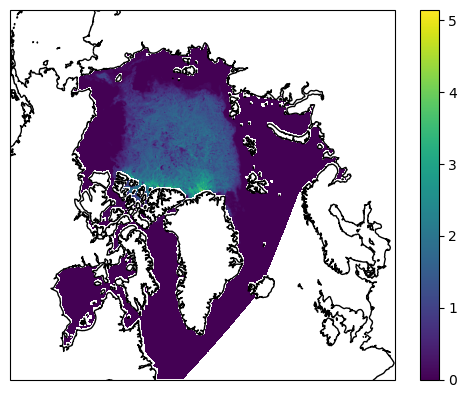

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.NorthPolarStereo(true_scale_latitude=90, central_longitude=-45))
im = ax.imshow(sit, extent=[x[0], x[-1], y[0], y[-1]], origin='lower')
ax.add_feature(COASTLINE)
plt.colorbar(im)
